Model V1 - Most basic model

In [22]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH="data_10.json"

In [3]:
# load data
def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)

    # convert lists into numpy arrays 
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs, targets

In [4]:
inputs, targets = load_data(DATASET_PATH)

In [5]:
# split the data training & test sets
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                          targets,
                                                                          test_size=0.3
                                                                         )

In [6]:
# build the newtwork architecture 
model = keras.Sequential([
    # input layer
    keras.Input(shape=(inputs.shape[1], inputs.shape[2])),
    keras.layers.Flatten(),

    # 1st hidden layer
    keras.layers.Dense(512, activation="relu"),

    # 2nd hidden layer
    keras.layers.Dense(256, activation="relu"),

    # 3rd hidden layer
    keras.layers.Dense(64, activation="relu"),

    # output layer
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 1690)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         865,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# train network 
history = model.fit(
    inputs_train, 
    targets_train,  
    validation_data=(inputs_test, targets_test),
    epochs=50,
    batch_size=32
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9627 - loss: 0.1271 - val_accuracy: 0.8414 - val_loss: 0.9851
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9792 - loss: 0.0542 - val_accuracy: 0.8604 - val_loss: 1.0319
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9375 - loss: 0.4016 - val_accuracy: 0.8083 - val_loss: 3.4093
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9009 - loss: 1.2657 - val_accuracy: 0.8876 - val_loss: 1.2648
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9331 - loss: 0.4402 - val_accuracy: 0.8769 - val_loss: 0.9037
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9559 - loss: 0.2461 - val_accuracy: 0.8178 - val_loss: 2.7850
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9291 - loss: 0.6277 - val_accuracy: 0.8663 - val_loss: 1.0121
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9576 - loss: 0.1408 - val_accuracy: 0.8781 - v

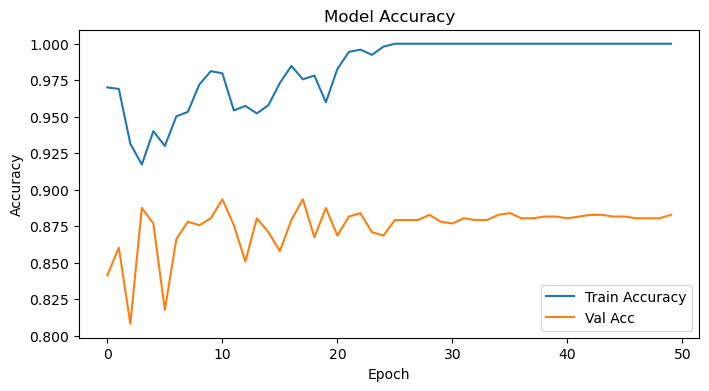

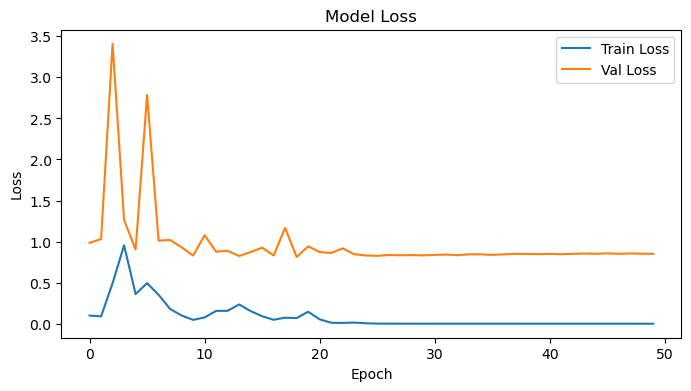

In [28]:
# Plot Training History for Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Training History for Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [18]:
# as a keras model
model.save('models/heart_sound_model_v1.keras')
# as a h5 model
model.save("models/heart_sound_model_v1.h5")